<a href="https://colab.research.google.com/github/acrizzijr/vivencial_dealing_with_Imbalance_Classes/blob/main/dealing_with_imbalance_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dealing with imbalance classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing data, exploratory data analysis and Visualizations

In [6]:
# df = pd.read_csv('winequality-red.csv', sep=';')
df = pd.read_csv('https://raw.githubusercontent.com/acrizzijr/vivencial_dealing_with_Imbalance_Classes/main/winequality-red.csv', sep=';')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

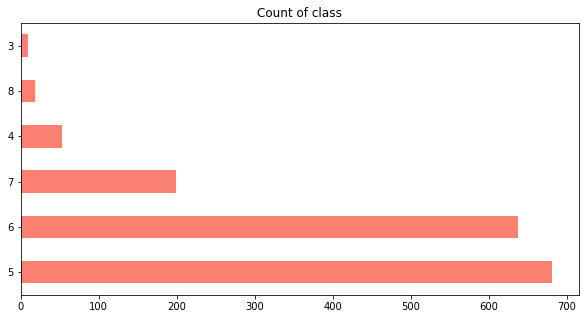

In [9]:
plt.figure(figsize=(10,5))
df.quality.value_counts().plot(kind='barh', title = 'Count of class', color='salmon');

As classes 3, 4 e 8 são desprezíveis diante da 5 e 6

In [10]:
def sea_plot(X, Y, label='Classes'):
    plt.figure(figsize=(8,5))
    sns.scatterplot(X['alcohol'], X['chlorides'], hue=Y['quality'], palette=c)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [11]:
def sea_plot1(X, Y, label='Classes'):
    plt.figure(figsize=(8,5))
    sns.scatterplot(X['pH'], X['volatile acidity'], hue=Y['quality'], palette=c1)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [12]:
c = sns.color_palette('Set2', 6)
c1 = sns.color_palette('cool', 6)

# Applying under sampling strategies: Random & Tomek Links

In [13]:
X = df.iloc[:, 0:11].copy()
# X.head(5)
Y = df.iloc[:, 11:].copy()
# Y.head()

In [14]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


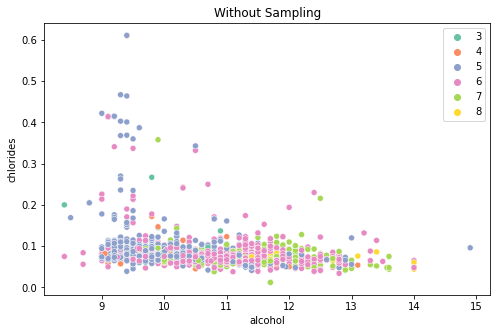

In [15]:
sea_plot(X,Y, 'Without Sampling')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


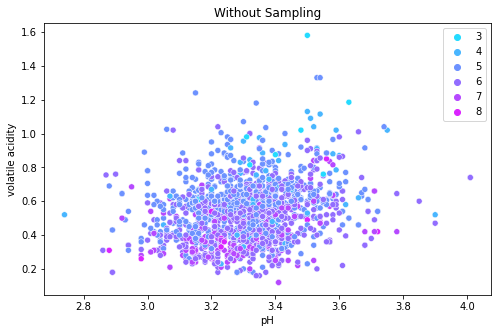

In [16]:
sea_plot1(X,Y, 'Without Sampling')

In [17]:
from imblearn.under_sampling import RandomUnderSampler

ran = RandomUnderSampler()
x_ran, y_ran = ran.fit_resample(X, Y)

y_ran.quality.value_counts()

3    10
4    10
5    10
6    10
7    10
8    10
Name: quality, dtype: int64

Com o Under Sampler, a quantidade de dados resultante foi baixa, de apenas 10 amostras

In [18]:
from imblearn.under_sampling import TomekLinks

tm = TomekLinks(sampling_strategy='all')
x_tm, y_tm = tm.fit_resample(X, Y)  #no Colab é resample (no jupyter é fit_sample)

y_tm.quality.value_counts()

5    589
6    533
7    166
4     32
8     10
3      5
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


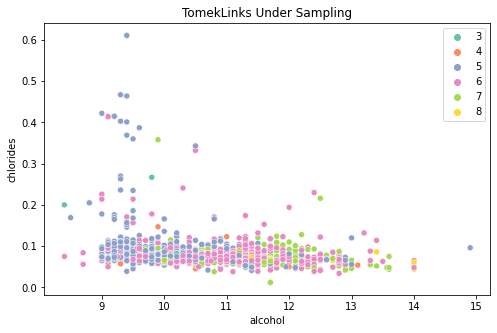

In [19]:
sea_plot( x_tm, y_tm, 'TomekLinks Under Sampling')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


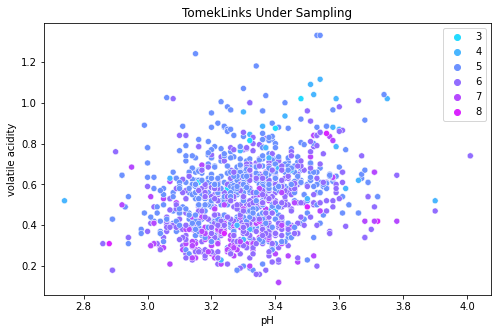

In [20]:
sea_plot1( x_tm, y_tm, 'TomekLinks Under Sampling')

# Applying over sampling strategies: ADASYN & SVMSMOTE

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X, Y)

y_sm.quality.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


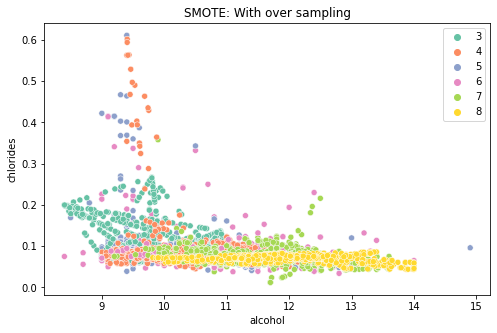

In [22]:
sea_plot(x_sm, y_sm, 'SMOTE: With over sampling')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


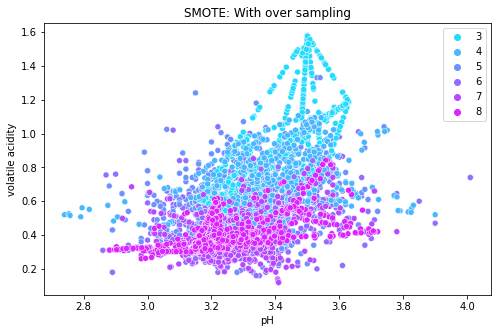

In [23]:
sea_plot1(x_sm, y_sm, 'SMOTE: With over sampling')

In [24]:
from imblearn.over_sampling import SVMSMOTE

svm = SVMSMOTE(sampling_strategy='not majority', k_neighbors=4)
x_svm, y_svm = svm.fit_resample(X, Y)

y_svm.quality.value_counts()

5    681
6    681
7    681
8    419
3    355
4    247
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


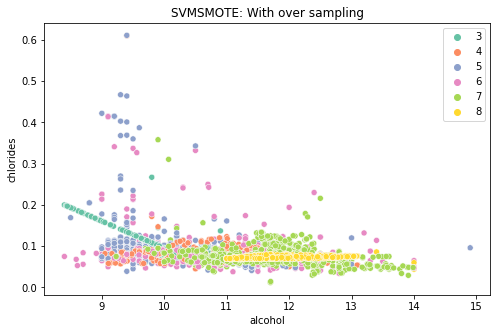

In [25]:
sea_plot(x_svm, y_svm, 'SVMSMOTE: With over sampling')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


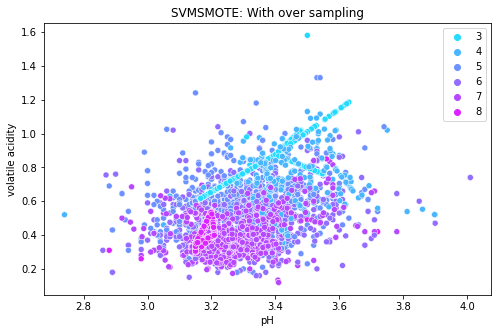

In [26]:
sea_plot1(x_svm, y_svm, 'SVMSMOTE: With over sampling')

# Combining Over & Under Sampling Strategies: SMOTETomek

In [27]:
from imblearn.combine import SMOTETomek

smtm = SMOTETomek(sampling_strategy= 'all')
x_smtm, y_smtm = smtm.fit_resample(X, Y)

y_smtm.quality.value_counts()

3    672
8    668
7    667
4    660
5    611
6    610
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


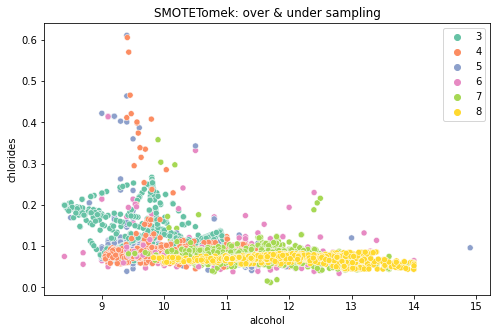

In [28]:
sea_plot(x_smtm, y_smtm, 'SMOTETomek: over & under sampling')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


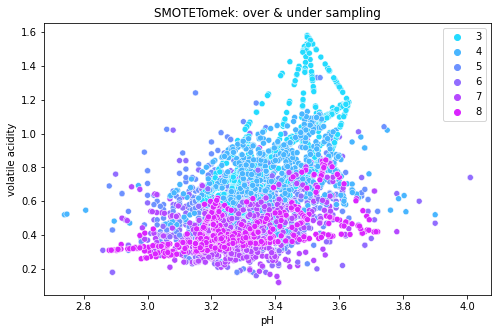

In [29]:
sea_plot1(x_smtm, y_smtm, 'SMOTETomek: over & under sampling')

# Metrics discussion & comparison of impact of strategies

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_smx, test_smx, train_smy, test_smy = train_test_split(x_sm, y_sm, 
                                                            test_size=0.20)

In [34]:
train_svmx, test_svmx, train_svmy, test_svmy = train_test_split(x_svm, y_svm, 
                                                                test_size=0.20)

In [35]:
train_smtmx, test_smtmx, train_smtmy, test_smtmy = train_test_split(x_smtm, 
                                                                    y_smtm, 
                                                                test_size=0.20)

In [36]:
train_smx.shape  #verificação do tamanho

(3268, 11)

In [38]:
test_smx.shape

(818, 11)

In [39]:
test_svmy.shape

(613, 1)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm

In [44]:
rf = RandomForestClassifier()
#for SMOTE
rf.fit(train_smx, train_smy.values.ravel())
y_predsm = rf.predict(test_smx)

In [46]:
cmat_sm = cm(test_smy, y_predsm)   #Confusion Matrix
cmat_sm

array([[139,   0,   0,   0,   0,   0],
       [  0, 124,   3,   0,   1,   0],
       [  3,   7, 108,  17,   1,   1],
       [  0,   3,  25,  82,  15,   6],
       [  0,   0,   4,   2, 140,   1],
       [  0,   0,   0,   0,   1, 135]])

In [47]:
rf = RandomForestClassifier()
#for SVMSMOTE
rf.fit(train_svmx, train_svmy.values.ravel())
y_predsvm = rf.predict(test_svmx)

In [48]:
cmat_svm = cm(test_svmy, y_predsvm)   #Confusion Matrix
cmat_svm

array([[ 74,   0,   2,   2,   0,   0],
       [  0,  45,   4,   2,   0,   0],
       [  0,   5, 102,  26,   4,   0],
       [  0,   5,  20,  94,  15,   0],
       [  0,   0,   2,   9, 123,   0],
       [  0,   0,   0,   0,   2,  77]])

In [49]:
#for SMOTETomek
rf = RandomForestClassifier()

rf.fit(train_smtmx, train_smtmy.values.ravel())
y_predsmtm = rf.predict(test_smtmx)

cmat_smtm = cm(test_smtmy, y_predsmtm)   #Confusion Matrix
cmat_smtm

array([[148,   0,   0,   0,   0,   0],
       [  0, 142,   4,   3,   0,   0],
       [  0,   5,  78,  15,   1,   0],
       [  2,   4,  20,  72,  21,   3],
       [  1,   0,   1,   6, 115,   1],
       [  0,   0,   0,   0,   1, 135]])

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

In [54]:
rotulos = ['3', '4', '5', '6', '7', '8']

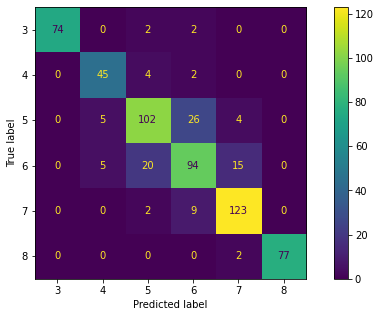

In [63]:
plt.rcParams['figure.figsize']=[10, 5]
cmd = ConfusionMatrixDisplay(cmat_svm, display_labels=rotulos)
cmd.plot();

In [64]:
from yellowbrick.classifier import ClassificationReport

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


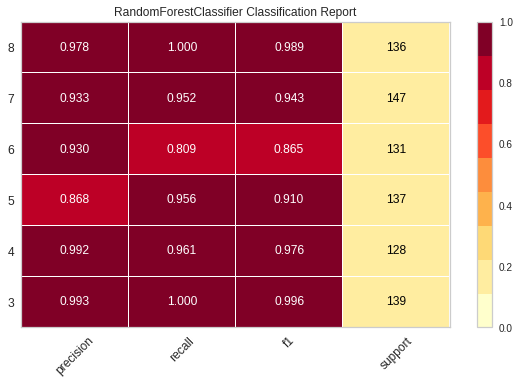

In [67]:
clr = ClassificationReport(estimator=rf, support = True)
clr.fit(train_smx, train_smy)
clr.score(test_smx, test_smy)
clr.show()

In [68]:
from sklearn.metrics import classification_report

In [71]:
cl1 = classification_report(test_smtmy, y_predsmtm, output_dict=True)
c_rep = pd.DataFrame(cl1).T
c_rep

,precision,recall,f1-score,support
3,0.980132,1.000000,0.989967,148.000000
4,0.940397,0.953020,0.946667,149.000000
5,0.757282,0.787879,0.772277,99.000000
6,0.750000,0.590164,0.660550,122.000000
7,0.833333,0.927419,0.877863,124.000000
8,0.971223,0.992647,0.981818,136.000000
accuracy,0.886889,0.886889,0.886889,0.886889
macro avg,0.872061,0.875188,0.871524,778.000000
weighted avg,0.883123,0.886889,0.883025,778.000000


In [75]:
c_rep1 = c_rep.copy()
c_rep1['support'] = c_rep1['support'].apply(int)
c_rep1.style.background_gradient(cmap = 'viridis', 
                                 subset=pd.IndexSlice['3':'8', :'f1-score'])

,precision,recall,f1-score,support
3,0.980132,1.000000,0.989967,148
4,0.940397,0.953020,0.946667,149
5,0.757282,0.787879,0.772277,99
6,0.750000,0.590164,0.660550,122
7,0.833333,0.927419,0.877863,124
8,0.971223,0.992647,0.981818,136
accuracy,0.886889,0.886889,0.886889,0
macro avg,0.872061,0.875188,0.871524,778
weighted avg,0.883123,0.886889,0.883025,778
